Vader: 
*   This uses a "bag of words" approach:
*   Stop words are removed
*   Each word is scored and combined to a total score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('vader_lexicon')

# Read in the data
df = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PostCovidMentalHealthRedditData.csv')
df = df.reset_index().rename(columns={'index': 'ID'})

print(df.shape)
df = df.head(500)
print(df.shape)

df.head()

(259, 9)
(259, 9)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


,ID,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,mentalhealth,Thank you to the woman who rang me out at Targ...,I went to target and picked out birthday cards...,Forgive me if I’m stating the obvious or sound...,2715,53,2021-11-13 03:49:11,qssml4
1,1,mentalhealth,Anyone else procrastinate going to sleep becau...,This is always a struggle for me. I just want ...,Happening as we speak,1756,89,2021-03-10 04:19:21,m1p609
2,2,mentalhealth,My doctor asked “Do you even want to get bette...,I’m fuming. She told me I need to tighten my b...,Our culture as a whole has \*zero\* appreciati...,1302,92,2021-01-13 15:40:23,kwiwdx
3,3,mentalhealth,My wife has passed suddenly,I'm 24 and have two children with my wife we w...,What a horrible tragedy and so close to a day ...,1290,65,2021-02-15 13:04:11,lkd9pd
4,4,mentalhealth,"I survived a school shooting, but now I can’t ...","I’m sure you’ve seen it on the news, Oxford Hi...",I'm an afghanistan vet. I tell you this becaus...,1286,63,2021-12-03 17:33:18,r84f46


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [3]:
# Run the polarity score on the entire dataset
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = str(row['Title'])
    content = str(row['Content'])
    
    resTitle[i] = sia.polarity_scores(title)
    resContent[i] = sia.polarity_scores(content)

  0%|          | 0/259 [00:00<?, ?it/s]

In [4]:
vadersTitle = pd.DataFrame(resTitle).T
vadersTitle = vadersTitle.reset_index().rename(columns={'index': 'ID'})
vadersTitle = vadersTitle.merge(df, on='ID', how='left')
vadersTitle.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.000,0.725,0.275,0.6486,mentalhealth,Thank you to the woman who rang me out at Targ...,I went to target and picked out birthday cards...,Forgive me if I’m stating the obvious or sound...,2715,53,2021-11-13 03:49:11,qssml4
1,1,0.072,0.895,0.033,-0.3291,mentalhealth,Anyone else procrastinate going to sleep becau...,This is always a struggle for me. I just want ...,Happening as we speak,1756,89,2021-03-10 04:19:21,m1p609
2,2,0.000,0.944,0.056,0.0772,mentalhealth,My doctor asked “Do you even want to get bette...,I’m fuming. She told me I need to tighten my b...,Our culture as a whole has \*zero\* appreciati...,1302,92,2021-01-13 15:40:23,kwiwdx
3,3,0.000,1.000,0.000,0.0000,mentalhealth,My wife has passed suddenly,I'm 24 and have two children with my wife we w...,What a horrible tragedy and so close to a day ...,1290,65,2021-02-15 13:04:11,lkd9pd
4,4,0.000,0.765,0.235,0.2846,mentalhealth,"I survived a school shooting, but now I can’t ...","I’m sure you’ve seen it on the news, Oxford Hi...",I'm an afghanistan vet. I tell you this becaus...,1286,63,2021-12-03 17:33:18,r84f46


In [5]:
vadersContent = pd.DataFrame(resContent).T
vadersContent = vadersContent.reset_index().rename(columns={'index': 'ID'})
vadersContent = vadersContent.merge(df, on='ID', how='left')
vadersContent.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.101,0.694,0.205,0.9694,mentalhealth,Thank you to the woman who rang me out at Targ...,I went to target and picked out birthday cards...,Forgive me if I’m stating the obvious or sound...,2715,53,2021-11-13 03:49:11,qssml4
1,1,0.095,0.658,0.247,0.4019,mentalhealth,Anyone else procrastinate going to sleep becau...,This is always a struggle for me. I just want ...,Happening as we speak,1756,89,2021-03-10 04:19:21,m1p609
2,2,0.112,0.888,0.000,-0.9513,mentalhealth,My doctor asked “Do you even want to get bette...,I’m fuming. She told me I need to tighten my b...,Our culture as a whole has \*zero\* appreciati...,1302,92,2021-01-13 15:40:23,kwiwdx
3,3,0.059,0.870,0.071,0.4351,mentalhealth,My wife has passed suddenly,I'm 24 and have two children with my wife we w...,What a horrible tragedy and so close to a day ...,1290,65,2021-02-15 13:04:11,lkd9pd
4,4,0.073,0.742,0.185,0.9687,mentalhealth,"I survived a school shooting, but now I can’t ...","I’m sure you’ve seen it on the news, Oxford Hi...",I'm an afghanistan vet. I tell you this becaus...,1286,63,2021-12-03 17:33:18,r84f46


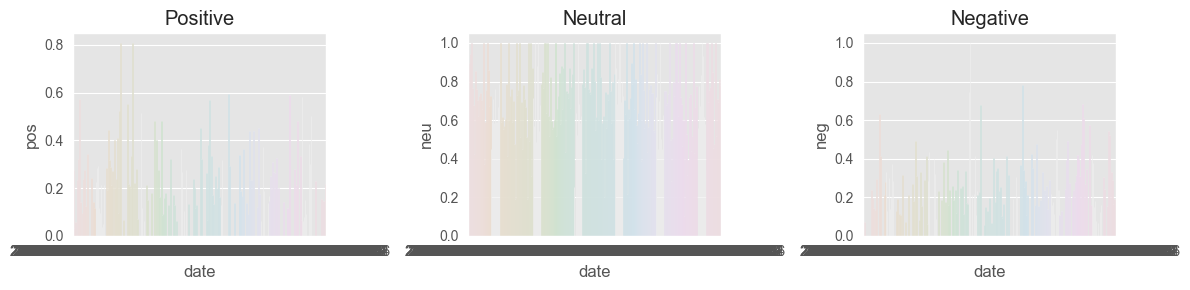

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersTitle, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersTitle, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersTitle, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

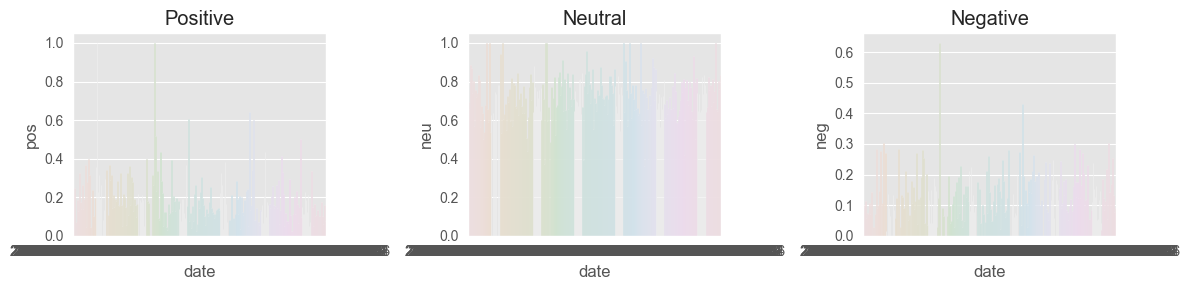

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersContent, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersContent, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersContent, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Huggingface Roberta Transformers: https://huggingface.co/docs/transformers/model_doc/roberta

Roberta Pretrained Model:
*   A model trained from a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [8]:
!pip install transformers

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [10]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [11]:
# Run for Roberta Model
robertaTitle = {}
robertaContent = {}
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        title = str(row['Title'])

        vader_title_result = sia.polarity_scores(title)
        vader_title_result_rename = {}

        for key, value in vader_title_result.items():
            vader_title_result_rename[f"vader_{key}"] = value
            
        roberta_title_result = polarity_scores_roberta(title)
        robertaTitle[i] = roberta_title_result
        resTitle[i] = {**vader_title_result_rename, **roberta_title_result}

    except RuntimeError:
        print(f'Broke for Title id {i}')

    try:
        content = str(row['Content'])

        vader_content_result = sia.polarity_scores(content)
        vader_content_result_rename = {}

        for key, value in vader_content_result.items():
            vader_content_result_rename[f"vader_{key}"] = value
            
        roberta_content_result = polarity_scores_roberta(content)
        robertaContent[i] = roberta_content_result
        resContent[i] = {**vader_content_result_rename, **roberta_content_result}

    except RuntimeError:
        print(f'Broke for Content id {i}')

  0%|          | 0/259 [00:00<?, ?it/s]

Broke for Content id 27
Broke for Content id 90
Broke for Content id 97
Broke for Content id 98
Broke for Content id 99
Broke for Content id 130
Broke for Content id 137
Broke for Content id 142
Broke for Content id 144
Broke for Content id 157
Broke for Content id 164
Broke for Content id 181
Broke for Content id 185
Broke for Content id 239
Broke for Content id 250
Broke for Content id 255


In [12]:
robertaTitleDF = pd.DataFrame(robertaTitle).T
robertaTitleDF = robertaTitleDF.reset_index().rename(columns={'index': 'ID'})
robertaTitleDF = robertaTitleDF.merge(df, on='ID', how='left')
robertaTitleDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

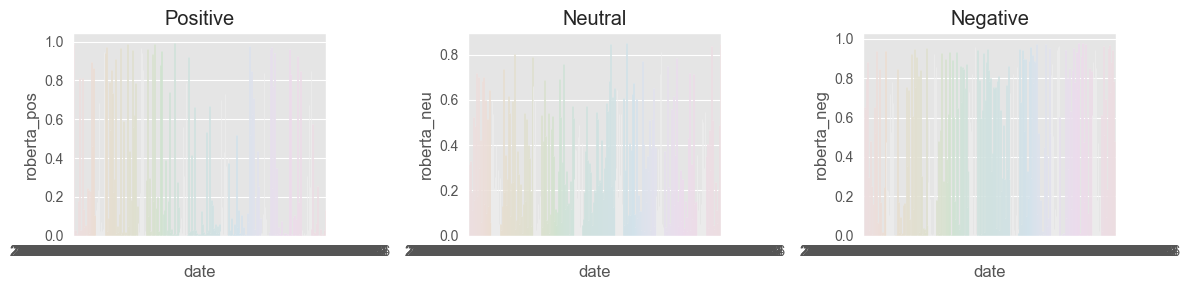

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [14]:
robertaContentDF = pd.DataFrame(robertaContent).T
robertaContentDF = robertaContentDF.reset_index().rename(columns={'index': 'ID'})
robertaContentDF = robertaContentDF.merge(df, on='ID', how='left')
robertaContentDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

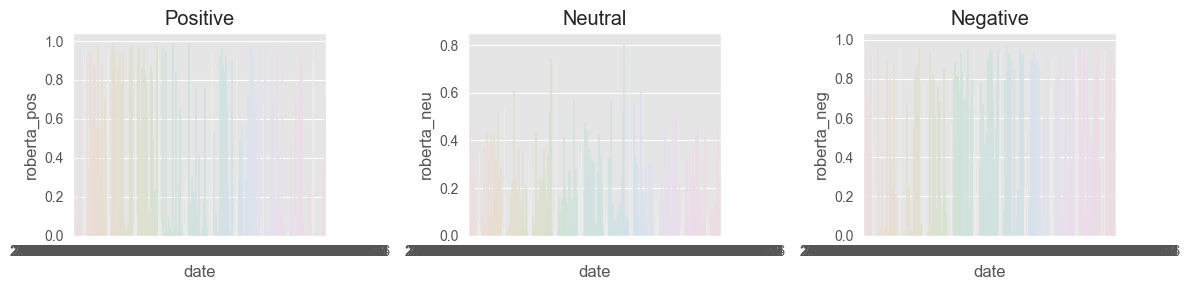

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [16]:
results_title_df = pd.DataFrame(resTitle).T
results_title_df = results_title_df.reset_index().rename(columns={'index': 'ID'})
results_title_df = results_title_df.merge(df, on='ID', how='left')
results_title_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

In [17]:
sns.pairplot(data=results_title_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()

In [ ]:
results_content_df = pd.DataFrame(resContent).T
results_content_df = results_content_df.reset_index().rename(columns={'index': 'ID'})
results_content_df = results_content_df.merge(df, on='ID', how='left')
results_content_df.columns

In [ ]:
sns.pairplot(data=results_content_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()